In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('data/NCI60_X.csv',index_col=0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,-0.244980,...,-0.590020,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000
V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,-0.084981,...,0.189980,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000
V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,-0.244980,...,-0.210019,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000
V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,-0.114980,...,0.089980,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000
V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,1.145019,...,0.299980,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [182]:
x_raw = df.copy()

In [183]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [184]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

In [185]:
kmc = KMeans(n_clusters=4)
kmc_scaled = KMeans(n_clusters=4)
kmc.fit(x_raw)
kmc_scaled.fit(x_scaled)

KMeans(n_clusters=4)

In [186]:
agg = AgglomerativeClustering(n_clusters=4)
agg_scaled = AgglomerativeClustering(n_clusters=4)
agg.fit(x_raw)
agg_scaled.fit(x_scaled)

AgglomerativeClustering(n_clusters=4)

In [187]:
#x['KMeans Cluster Label'] = kmc.labels_
#x['Agglomerative Cluster Label'] = agg.labels_
#x.head()

In [188]:
kmc_score = silhouette_score(x_raw, kmc.labels_, metric = 'euclidean')
kmc_score_scaled = silhouette_score(x_scaled, kmc_scaled.labels_, metric = 'euclidean')
agg_score = silhouette_score(x_raw, agg.labels_, metric = 'euclidean')
agg_score_scaled = silhouette_score(x_scaled, agg_scaled.labels_, metric = 'euclidean')

In [189]:
from sklearn.decomposition import PCA

In [190]:
pca = PCA(n_components=30)
pca_scaled = PCA(n_components=30)
x_raw_pca = pca.fit_transform(x_raw)
x_scaled_pca = pca_scaled.fit_transform(x_scaled)

In [191]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca_scaled.explained_variance_ratio_.sum())

[633.2155946  352.92781432 279.91889551 183.08301876 163.55724025
 149.09652999 122.28813829 119.79085723 112.17700129  91.70887063
  89.28683679  85.12141725  77.80627179  75.09895635  71.08767369
  68.44458093  67.06801451  61.78211822  61.51023415  59.92445726
  58.3393656   54.89095437  53.46689723  50.23439113  49.5208593
  46.77362811  44.88865142  43.65822626  42.88319662  41.02015889]
[0.14892938 0.08300699 0.06583563 0.04306028 0.03846791 0.03506681
 0.0287616  0.02817426 0.02638351 0.0215695  0.02099985 0.02002016
 0.01829968 0.01766293 0.01671949 0.01609785 0.01577409 0.01453087
 0.01446692 0.01409396 0.01372115 0.0129101  0.01257517 0.0118149
 0.01164708 0.01100094 0.0105576  0.01026821 0.01008593 0.00964775]
0.8021504932152523
0.778472507408372


In [192]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca_scaled = KMeans(n_clusters=4)
kmc_pca.fit(x_raw_pca)
kmc_pca_scaled.fit(x_scaled_pca)

KMeans(n_clusters=4)

In [193]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca_scaled = AgglomerativeClustering(n_clusters=4)
agg_pca.fit(x_raw_pca)
agg_pca_scaled.fit(x_scaled_pca)

AgglomerativeClustering(n_clusters=4)

In [194]:
kmc_score_pca = silhouette_score(x_raw_pca, kmc_pca.labels_, metric = 'euclidean')
kmc_score_scaled_pca = silhouette_score(x_scaled_pca, kmc_pca_scaled.labels_, metric = 'euclidean')
agg_score_pca = silhouette_score(x_raw_pca, agg_pca.labels_, metric = 'euclidean')
agg_score_scaled_pca = silhouette_score(x_scaled_pca, agg_pca_scaled.labels_, metric = 'euclidean')

Text(0, 0.5, 'The explained varaince')

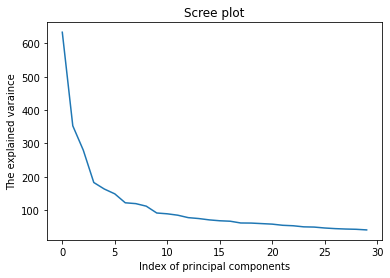

In [195]:
ax = sns.lineplot(pca.explained_variance_)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained varaince")

In [196]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-19.795777,-0.115169,5.969093,4.752312,4.885742,18.927904,-13.219668,18.037147,-18.630122,-7.312089,...,5.164600,3.636333,-2.881225,1.879220,6.392123,1.307912,1.417100,4.595691,0.528778,-0.193965
1,-21.546108,1.457336,9.019484,6.768953,2.245869,17.072371,-13.017079,21.341356,-22.119102,-15.289527,...,3.942821,0.488694,2.074534,5.124729,4.849580,0.748667,1.223509,-2.518775,0.549107,-1.489649
2,-25.056614,-1.526075,6.959600,2.783155,10.822089,16.454939,-5.272387,1.421403,-5.702820,0.401388,...,-4.524455,-6.923889,-5.470206,4.559697,1.893223,-6.898879,-5.765576,-8.049831,-1.883358,-7.683441
3,-37.409557,11.389102,5.406621,15.448145,15.997226,33.081867,-4.540125,0.877284,4.995304,-3.712937,...,-10.714067,9.338327,17.779039,-11.746025,-9.401664,-7.162370,0.519719,-1.755194,-2.175697,-2.121769
4,-50.218635,1.346185,17.599965,15.097782,13.852855,16.943452,-11.548787,-22.157610,18.944540,7.663567,...,7.725331,-0.657274,1.939148,-11.765634,1.363755,-4.100492,-13.131545,-8.517253,-5.018124,4.747424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-15.446079,44.164707,-14.930242,-8.060633,-1.588155,-5.817447,3.376684,-0.213353,18.529496,-4.849736,...,-2.093396,11.777023,-0.193940,3.674539,4.626615,0.811043,-3.782710,7.064783,0.830220,-0.660673
60,-1.925439,35.328490,-11.411218,-0.204828,2.187533,-4.193463,0.905162,3.662230,11.921212,-0.547724,...,-0.588718,3.204167,-0.188602,0.693411,9.406384,0.969198,1.266102,4.478535,2.470356,-3.546546
61,-14.359564,33.291673,-14.764290,-0.384480,2.373865,-1.018851,-0.200922,0.336370,6.871808,1.388368,...,-5.825327,-1.074927,4.129694,0.950482,2.896673,11.839147,-0.176752,1.360650,-0.945667,0.003767
62,-12.740123,45.223167,-10.154477,-1.061559,2.454937,-1.826221,-2.145286,-0.752766,4.231288,5.078227,...,0.119093,-2.658127,1.588695,8.344724,-4.618069,-4.270074,-1.045191,-3.497537,-7.920418,3.996553


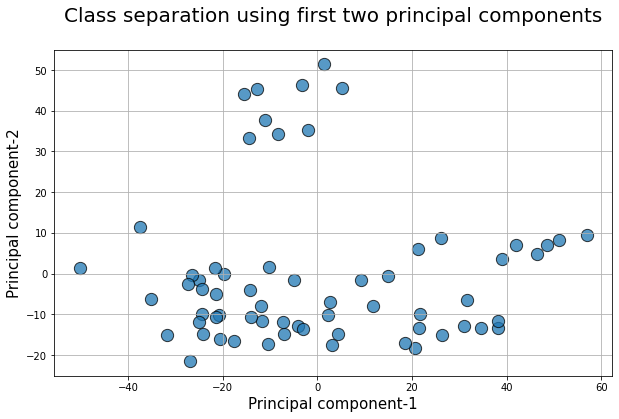

In [197]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [198]:
comparison = (('Raw', kmc_score, agg_score),
      ('Scaled', kmc_score_scaled, agg_score_scaled),
      ('Raw PCA', kmc_score_pca, agg_score_pca),
      ('Scaled PCA', kmc_score_scaled_pca, agg_score_scaled_pca))

In [199]:
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df

,KMeans,Agglomerative
Dataset,,
Raw,0.112703,0.112703
Scaled,0.072689,0.076382
Raw PCA,0.162850,0.162850
Scaled PCA,0.132960,0.114778


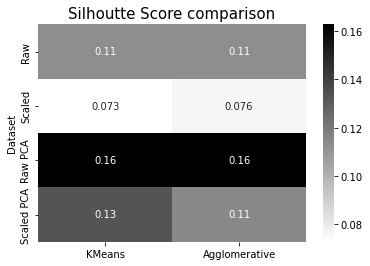

In [200]:
sil_comparison = sns.heatmap(comparison_df,cmap='binary', annot=True)
sil_comparison.set_title("Silhoutte Score comparison",fontsize=15)
plt.show()

Therefore K means clustering on raw dataset gives the best score